In [1]:
#匯入模組
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#讀取mnist手寫資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
#將features(數字影像特徵)轉換為一維陣列
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test = x_test_image.reshape(10000,784).astype('float32')

In [4]:
#將影像特徵值標準化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [5]:
#one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [6]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立線性堆疊模型
model = Sequential()

In [8]:
#建立輸入層與隱藏層
#Dense神經網路層好處:上一層與下一層的神經元，完全連結
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [9]:
#softmax 將神經元的輸出，轉換為預測每一個數字的機率
#輸出層不需要建立input _dim因為keras會自動依照上一層的units建立
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#訓練模型
#透過compile方法，對模型進行設定
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss(loss function):usually use cross_entropy，the result is better than others
#optimizer:深度學習使用adam最優化方法，讓訓練更快收斂，提高準確率
#metrics:設定評估模型方式-accuracy

In [12]:
train_history = model.fit(x=x_train_normalize,
                          y=y_train_onehot,
                          validation_split = 0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Epoch 1/10
240/240 - 2s - accuracy: 0.9155 - loss: 0.2909 - val_accuracy: 0.9586 - val_loss: 0.1487
Epoch 2/10
240/240 - 2s - accuracy: 0.9667 - loss: 0.1162 - val_accuracy: 0.9686 - val_loss: 0.1047
Epoch 3/10
240/240 - 2s - accuracy: 0.9792 - loss: 0.0740 - val_accuracy: 0.9710 - val_loss: 0.0953
Epoch 4/10
240/240 - 2s - accuracy: 0.9856 - loss: 0.0517 - val_accuracy: 0.9727 - val_loss: 0.0865
Epoch 5/10
240/240 - 2s - accuracy: 0.9906 - loss: 0.0355 - val_accuracy: 0.9761 - val_loss: 0.0786
Epoch 6/10
240/240 - 2s - accuracy: 0.9934 - loss: 0.0261 - val_accuracy: 0.9796 - val_loss: 0.0701
Epoch 7/10
240/240 - 2s - accuracy: 0.9957 - loss: 0.0181 - val_accuracy: 0.9787 - val_loss: 0.0714
Epoch 8/10
240/240 - 2s - accuracy: 0.9975 - loss: 0.0130 - val_accuracy: 0.9781 - val_loss: 0.0718
Epoch 9/10
240/240 - 2s - accuracy: 0.9984 - loss: 0.0095 - val_accuracy: 0.9774 - val_loss: 0.0782
Epoch 10/10
240/240 - 2s - accuracy: 0.9986 - loss: 0.0075 - val_accuracy: 0.9793 - val_loss: 0.0751

In [13]:
#顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

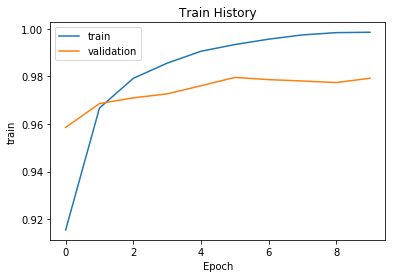

In [14]:
show_train_history(train_history,'accuracy','val_accuracy')
#overfitting問題更嚴重，可以透過加入dropout來解決這個問題
#dropout功能是每次訓練迭代時，會隨機地在隱藏層中放棄50%的神經元來避免overfitting

In [15]:
#模型準確率
scores = model.evaluate(x_test_normalize,y_test_onehot)
print('accuracy',scores[1])

313/313 [==============================] - 1s 3ms/step - accuracy: 0.9787 - loss: 0.0670
accuracy 0.9786999821662903
